<a href="https://colab.research.google.com/github/anjackson/unseen-formats/blob/master/notebooks/Format_Registry_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Format Registry Coverage Comparison

While working on identifying formats in the UK Web Archive, I became interested in the relative coverage between different format registries. Many format registries aspire to include _all_ formats, and the expected usage of things like PRONOM identifiers in digital preservation metadata reinforces this aspiration.  But having come across a number of unexpected discrepencies, I started trying to find a way to aggregate different format registries so they could be searched across, and compared. This lead the creation of...

<https://www.digipres.org/formats/>

This merges all the registries in two different ways.  First, by building a MIME type tree, so that fine-grained format versions can be nested under their parent formats, e.g. [`application/pdf`](https://www.digipres.org/formats/mime-types/#application/pdf). And second, as a simple list of all known file extensions, e.g. [`*.pdf`](https://www.digipres.org/formats/extensions/#*.pdf)

This makes is easy to search for information about a format across all these sources, in one place.  It also makes it possible to perform some automated Qa on each data source, and build datasets that can be used to compare the different registries.

## Comparing format coverge

This notebook takes the file extension summary from the [digipres.org registry comparison data](https://github.com/digipres/digipres.github.io/tree/master/_data/formats), and compares the coverage across registries.

As there are so many registries to compare, a Venn diagram can't show the overlaps (Venn diagrams can only really show three-set overlaps reliably). So, we also install `upsetplot` which [can be used plot multiset data](https://upsetplot.readthedocs.io/en/stable/#loading-datasets).

In [40]:
!pip install upsetplot matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


First we load [the `extensions.yml` data](https://raw.githubusercontent.com/digipres/digipres.github.io/master/_data/formats/extensions.yml) and plot the overall stats of the sets...

In [3]:
import yaml
import urllib
from urllib import request

x = urllib.request.urlopen("https://raw.githubusercontent.com/digipres/digipres.github.io/master/_data/formats/extensions.yml")
exts = yaml.safe_load(x)

sets = {}
for ext in exts['extensions']:
  info = exts['extensions'][ext]
  for id in info['identifiers']:
    reg_id = id['regId']
    reg_set = sets.get(reg_id, set())
    reg_set.add(ext)
    sets[reg_id] = reg_set

#for k in sets:
#  print(f"{k} -> {len(sets[k])}: {sets[k]}")

We can now compare the sets, using Venn diagrams. Looking at the registries maintained directly by iPres commmunity members, [PRONOM](https://www.loc.gov/preservation/digital/formats/fdd/descriptions.shtml) and the [Library of Congress Format Description Database](https://www.loc.gov/preservation/digital/formats/fdd/descriptions.shtml), we see that about a third of the unique files extensions in the latter registry do not have a corresponding PRONOM record.

[]

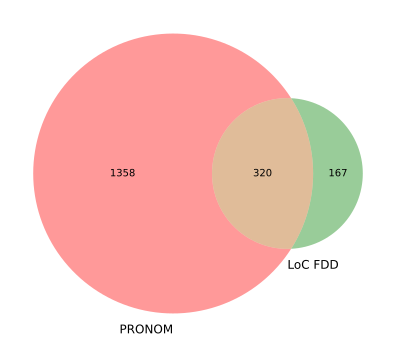

In [4]:
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn2

plt.figure(figsize=(8, 6), dpi=80)
venn2([sets['pronom'], sets['fdd']],('PRONOM', 'LoC FDD'))
plt.plot()

Given the widespread usage of PRONOM IDs in digital preservation workflows, I found this surprising. Looking at the extensions unique to LoC FDD, it seems a few of them are consequences of inconsistencies in the data (see [the corresponsing aggregator issues](https://www.digipres.org/formats/sources/fdd/issues/)). But most appear to be slightly rarer formats, presumably ones more promenent at the Library of Congress than at the UK National Archives.

In [8]:
print(sets['fdd'] - sets['pronom'])

{'*.stk', '*.dfxml', '*.fbn', '*.gtiff', '*.r00', '*.ptif', '*.aes', '*.woz', '*.bfm', '*.jmh', '*.pt3', '*.pt', '*.epi', '*.dmf', '*.sou', '*.bsqw', '*.aa', '*.avif', '*.heml', '*.pfc', '*.xfd', '*.abc', '*.odm', '*.par', '*.xyz', '*.logicx', '*.si7', '*.heifs', '*.xmt', '*.pth', '*.qti', '*.cdxml', '*.669', '*.txm', '*.ief', '*.x3db', '*.gvi', '*.mlm', '*.qt', '*.heif', '*.sec', '*.flt', '*.macbin', '*.kdc', '*.he4', '*.xap', '*.med', '*.spiff', '*.df6', '*.otc', '*.doq', '*.mt2', '*.aaf', '*.hdp', '*.rlcw', '*.j', '*.dft', '*.ppc', '*.id', '*.xhe', '*.s7z', '*.cmpt', '*.fla', '*.qal', '*.pxx', '*.df4', '*.par2', '*.atmos.audio', '*.moof', '*.fas', '*.pnts', '*.ifb', '*.idx', '*.epsi', '*.m4p', '*.vrm', '*.ult', '*.df5', '*.spk', '*.x3dz', '*.brf', '*.jxs', '*.logic', '*.usd', '*.emlx', '*.df7', '*.damf', '*.wrz', '*.ipa', '*.wow', '*.loas', '*.enlp', '*.xrm', '*.fsa', '*.lyr', '*.avifs', '*.map.xml', '*.hdfeos', '*.bmpw', '*.i3dm', '*.x3dvz', '*.atmos', '*.zsav', '*.thf', '*.rat', '

Using this approach, we can also compare with format registries from other sources.

Now comparing with [Apache Tika](https://tika.apache.org/), which is a fairly large registry more focussed on using format identification to extract metadata and text for search, especially from resources found on the web.

[]

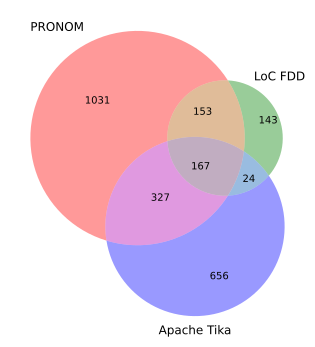

In [9]:
plt.figure(figsize=(8, 6), dpi=80)
venn3([sets['pronom'], sets['fdd'], sets['tika']],('PRONOM', 'LoC FDD', 'Apache Tika'))
plt.plot()

Similarly, we can compare against the [File Formats Wiki](http://fileformats.archiveteam.org/) which was started by folks working outside of the 'institutional' digital preservation community and has rapidly grown in size since it's launch in 2019 (see e.g. [this Hacker News post](https://news.ycombinator.com/item?id=25234594).  It now receives updates from a range institutional and individual contributors.

[]

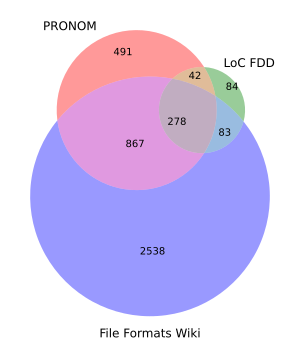

In [10]:
plt.figure(figsize=(8, 6), dpi=80)
venn3([sets['pronom'], sets['fdd'], sets['ffw']],('PRONOM', 'LoC FDD', 'File Formats Wiki'))
plt.plot()

The same approach shows similar results when comparing against the [TRiD](https://mark0.net/soft-trid-e.html), with many thousands of extensions that are unknown to PRONOM.

[]

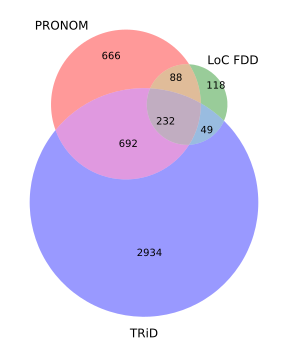

In [11]:
plt.figure(figsize=(8, 6), dpi=80)
venn3([sets['pronom'], sets['fdd'], sets['trid']],('PRONOM', 'LoC FDD', 'TRiD'))
plt.plot()


Finally, while the GitHub Linguist registry is of a similar size to PRONOM, the overlap here even smaller, with only 10% of unique extensions being common to both. This is perhaps less surprising, as GitHub Linguist is focussed on identifying source code file formats, which are of less interest to other registries.

[]

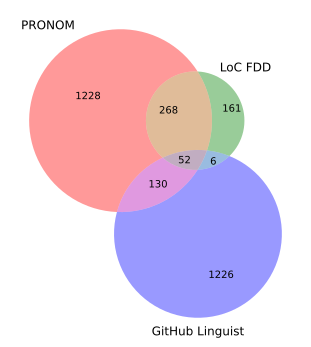

In [12]:
plt.figure(figsize=(8, 6), dpi=80)
venn3([sets['pronom'], sets['fdd'], sets['githublinguist']],('PRONOM', 'LoC FDD', 'GitHub Linguist'))
plt.plot()

[]

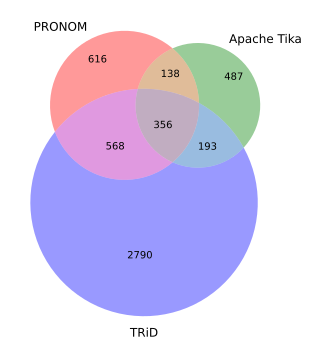

In [13]:
plt.figure(figsize=(8, 6), dpi=80)
venn3([sets['pronom'], sets['tika'], sets['trid']],('PRONOM', 'Apache Tika', 'TRiD'))
plt.plot()

Finally, we compare against the WikiData format entries, which come from Wikipedia pages on formats and as such represent the largest format registry in this comparison. _TODO_ find out if this effort is driven by the other registries, and the status of https://wikidp.org/ etc.

[]

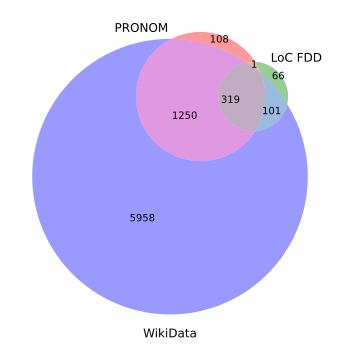

In [14]:
plt.figure(figsize=(8, 6), dpi=80)
venn3([sets['pronom'], sets['fdd'], sets['wikidata']],('PRONOM', 'LoC FDD', 'WikiData'))
plt.plot()

While this very large registry has the greatest degree of overlap with PRONOM and LoC FDD, a modest gap remains:

In [15]:
print("PRONOM unique entensions compared to Wikidata", sets['pronom'] - sets['wikidata'])
print("LoC FDD unique entensions compared to Wikidata", sets['fdd'] - sets['wikidata'])

PRONOM unique entensions compared to Wikidata {'*.ppmb', '*.ogwu', '*.w07', '*.e19', '*.e07', '*.e17', '*.err', '*.vsm', '*.aoi', '*.e10', '*.e06', '*.sbxls', '*.opju', '*.dted', '*.pt4', '*.w04', '*.src.rpm', '*.e08', '*.f03', '*.w14', '*.cql', '*.oggu', '*.sha512', '*.e14', '*.myi', '*.ebcdic', '*.w09', '*.m2v', '*.z3d', '*.ega', '*.ogw', '*.vmo', '*.w17', '*.nms', '*.qxp report', '*.wls', '*.w11', '*.w15', '*.afi', '*.w10', '*.e09', '*.xtg', '*.bpx', '*.sha1', '*.vso', '*.e03', '*.swatches', '*.md5', '*.trn', '*.exclude', '*.ogmu', '*.xdm', '*.p7s', '*.w51', '*.mxt', '*.e20', '*.w19', '*.sldm', '*.e11', '*.mxi', '*.ndt', '*.gcc', '*.qtm', '*.w02', '*.prapic', '*.e15', '*.e05', '*.e18', '*.framemd5', '*.w16', '*.e04', '*.w61', '*.w06', '*.icons', '*.w21', '*.plc', '*.esq', '*.w03', '*.yenc', '*.e16', '*.w22', '*.w08', '*.ft3', '*.w20', '*.e13', '*.w12', '*.pbmb', '*.qxb', '*.cog', '*.acv', '*.pipe', '*.w13', '*.e02', '*.ft2', '*.qxp%20report', '*.w62', '*.pgmb', '*.drt', '*.w18', '*.

## Comparing more than three sources at once

Doing a full comparison across all registries is more challenging, as Venn diagrams don't work well when there are a lot of sets to cover. In this case we can use an [UpSet Plot](https://en.wikipedia.org/wiki/UpSet_Plot), which helps us see just how complicated the situation really is.

/home/anj/unseen-formats/.venv/lib/python3.11/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/anj/unseen-formats/.venv/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"]

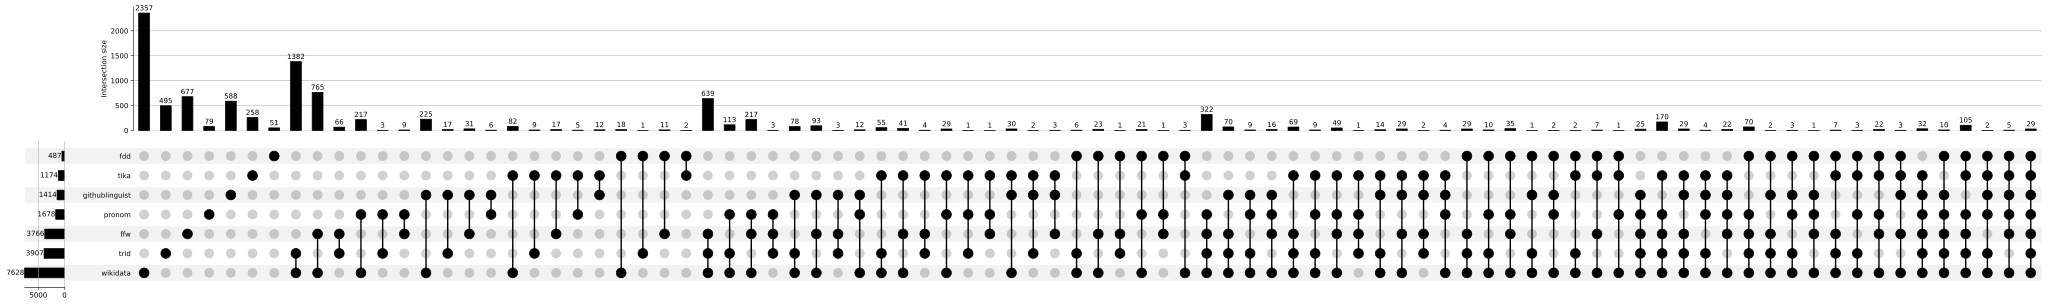

In [16]:
from upsetplot import from_contents
from upsetplot import UpSet

upset_sets = from_contents(sets)

upset = UpSet(upset_sets, show_counts=True, show_percentages=False, orientation='horizontal', element_size=40)
# Highlight PRONOM, FFD and PRONOM+FFD
#upset.style_subsets(absent=["tika", "githublinguist", "ffw", "trid"], edgecolor="red", linewidth=2)
# Highlight PRONOM:
#upset.style_subsets(present=["pronom"], edgecolor="red", linewidth=2)
upset.plot()

plt.show()

If we treat GitHub Linguist as an unusual case and omit if from the comparison, the picture a little more consistent, but only a little.

/home/anj/unseen-formats/.venv/lib/python3.11/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/anj/unseen-formats/.venv/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"]

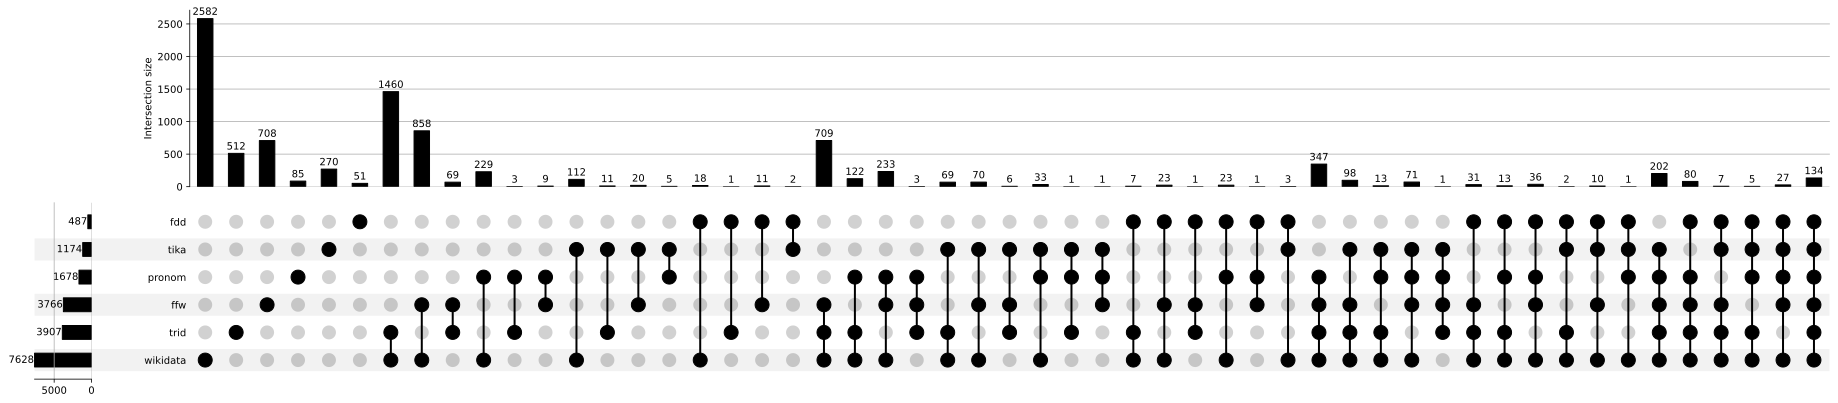

In [17]:
# Copy the sets, dropping one element:
subsets = dict((i,sets[i]) for i in sets if i!='githublinguist')
upset_sets = from_contents(subsets)

upset = UpSet(upset_sets, show_counts=True, show_percentages=False, orientation='horizontal', element_size=40)
upset.plot()

plt.show()

This show that all registries have a significant number of formats that are unique to it and do not appear in any other registries. Even the very large ones, like the File Formats Wiki and TRiD, have only a modest degree of overlap with each other (700 extensions out of three/four thousand). And even the much smaller LoC FDD registry is not completely subsumed by the large ones, with 49 file extensions that don't appear anywhere else.

This is _hopefully_ due to some systematic bias between the different registries.  I say 'hopefully' because if these selections were drawn at random, this would imply that there was a much larger underlying population of many thousands of valid file extensions out there.

Putting that aside, the point remains that if we wish to improve the coverage across these registries, that will require a significant increase in the amount of people working towards this goal.